In [1]:
#Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/arthur/Documents/Flatiron/phase_1/Project/main_microsoft_movies/microsoft_movies/individuals/arthur'

In [3]:
cd ../..

/Users/arthur/Documents/Flatiron/phase_1/Project/main_microsoft_movies/microsoft_movies


In [4]:
#read in the relevant data files
basics_df = pd.read_csv("data/imdb.title.basics.csv")
ratings_df = pd.read_csv("data/imdb.title.ratings.csv")
principals_df = pd.read_csv("data/imdb.title.principals.csv")
imdb_name_df = pd.read_csv("data/imdb.name.basics.csv")

In [5]:
#remove all rows without a genre
basics_df.dropna(subset=['genres'], inplace=True)

In [6]:
#coverted the genres column, which has genres separated by columns into
#list of strings
basics_df['genres'] = basics_df['genres'].str.strip().str.split(',')

In [7]:
#create a new df with the list of genres separated out into individual rows
e_basics_df = basics_df.explode('genres')
e_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,War
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [8]:
#filter the basics_df for top 4 genres
f_basics_df = e_basics_df[(e_basics_df['genres'] == 'Action') |
                          (e_basics_df['genres'] == 'Adventure') |
                          (e_basics_df['genres'] == 'Fantasy') |
                          (e_basics_df['genres'] == 'Sci-Fi') |
                          (e_basics_df['genres'] == 'Animation')]

In [9]:
#merge the e_basics_df with the ratings_df
combined_df = pd.merge(f_basics_df, ratings_df, how='inner', on='tconst')

In [10]:
#merge the principals and names dfs
combined_df = pd.merge(combined_df, principals_df, on='tconst', how='inner')
combined_df = pd.merge(combined_df, imdb_name_df, on='nconst', how='inner')

In [11]:
#review which years are included in the 'start_year' column
combined_df['start_year'].sort_values().unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [12]:
#filter for movies that start_year after 2014
combined_df = combined_df[(combined_df['start_year'] > 2014)]

In [32]:
from tools.data_preparation import *
merge_imdb_top_crew()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
313464,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,Drama,9.5,6509,2,nm1257062,actress,NaN,"[""Queen Anula""]",Dilhani Ekanayake,NaN,NaN,actress,"tt7886862,tt7765978,tt7985998,tt7051292"
317943,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,Drama,9.5,6509,1,nm5324158,actor,NaN,"[""King Walagamba""]",Uddika Premarathna,1980.0,NaN,actor,"tt3471472,tt2456330,tt5326222,tt5963218"
332381,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,Drama,9.5,6509,7,nm5465931,writer,NaN,NaN,Saman Weeraman,1950.0,NaN,"writer,director,actor","tt1532567,tt2629322,tt5963218"
486000,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,Drama,9.5,6509,3,nm6229748,actor,NaN,"[""Theeya""]",Roshan Ravindra,NaN,NaN,actor,"tt7860124,tt7641390,tt5963218,tt5886716"
486001,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,Drama,9.5,6509,4,nm8359419,actress,NaN,NaN,Menaka Peiris,NaN,NaN,actress,"tt7765978,tt2615802,tt5963218"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511236,tt7221896,Cumali Ceber: Allah Seni Alsin,Cumali Ceber: Allah Seni Alsin,2017,100.0,Comedy,1.3,36986,3,nm7314835,actor,NaN,"[""Cüneyt""]",Emre Keskin,NaN,NaN,actor,"tt7221896,tt8402090,tt4670912,tt8173726"
511238,tt7221896,Cumali Ceber: Allah Seni Alsin,Cumali Ceber: Allah Seni Alsin,2017,100.0,Comedy,1.3,36986,4,nm8761358,actress,NaN,"[""Basak""]",Ceyda Saltadal,NaN,NaN,actress,"tt8578422,tt4685332,tt7550774,tt3588526"
511239,tt7221896,Cumali Ceber: Allah Seni Alsin,Cumali Ceber: Allah Seni Alsin,2017,100.0,Comedy,1.3,36986,5,nm9107963,director,NaN,NaN,Gökhan Gök,NaN,NaN,"director,writer",tt7221896
511240,tt7221896,Cumali Ceber: Allah Seni Alsin,Cumali Ceber: Allah Seni Alsin,2017,100.0,Comedy,1.3,36986,6,nm9107965,writer,NaN,NaN,Cihan Berk Berkeban,NaN,NaN,writer,NaN


In [13]:
#review which job titles are included
combined_df['category'].unique()

array(['composer', 'actor', 'actress', 'director', 'writer', 'producer',
       'production_designer', 'editor', 'cinematographer', 'self',
       'archive_footage', 'archive_sound'], dtype=object)

In [25]:
#filter job titles for actor/actress, director, and writer
combined_df = combined_df[(combined_df['category'] == 'director')]
combined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
18,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Fantasy,6.5,119,5,nm0749914,director,original director,NaN,Raoul Ruiz,1941.0,2011.0,"director,writer,producer","tt0417871,tt0084824,tt1236371,tt0100275"
20,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Fantasy,6.5,119,6,nm0765384,director,completion director,NaN,Valeria Sarmiento,1948.0,NaN,"editor,director,writer","tt0100275,tt1928329,tt0166656,tt0089706"
139,tt0276568,To Chase a Million,To Chase a Million,2018,97.0,Action,7.4,5,5,nm0413912,director,NaN,NaN,Pat Jackson,1916.0,2011.0,"director,production_designer,writer","tt0045172,tt0044586,tt0052370,tt0044214"
145,tt0283440,Short Time Heroes,Kurzzeithelden,2015,45.0,Sci-Fi,6.6,16,5,nm0905839,director,NaN,NaN,Christine Wagner,1963.0,NaN,"camera_department,cinematographer,director","tt0359984,tt0383222,tt0283440,tt0446792"
146,tt0283440,Short Time Heroes,Kurzzeithelden,2015,45.0,Sci-Fi,6.6,16,6,nm1549344,director,co-director,NaN,Roman Gonther,NaN,NaN,"visual_effects,director,writer","tt6726330,tt0283440,tt1838504,tt4960962"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150550,tt9894394,Upin & Ipin: The Lone Gibbon Kris,Upin & Ipin: Keris Siamang Tunggal,2019,100.0,Animation,8.1,301,5,nm10529303,director,NaN,NaN,Adam Bin Amiruddin,NaN,NaN,director,NaN
150551,tt9894394,Upin & Ipin: The Lone Gibbon Kris,Upin & Ipin: Keris Siamang Tunggal,2019,100.0,Animation,8.1,301,6,nm10529305,director,NaN,NaN,Syed Nurfaiz Khalid bin Syed Ibrahim,NaN,NaN,"director,special_effects",NaN
150552,tt9894394,Upin & Ipin: The Lone Gibbon Kris,Upin & Ipin: Keris Siamang Tunggal,2019,100.0,Animation,8.1,301,7,nm10529304,director,NaN,NaN,Ahmad Razuri bin Roseli,NaN,NaN,"director,actor,special_effects",NaN
150563,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,108.0,Adventure,7.9,61,5,nm9546685,director,NaN,NaN,Robert Fernandez,NaN,NaN,"director,writer,producer","tt7907772,tt7907958,tt9896916,tt7900784"


In [26]:
num_genres = combined_df.groupby('tconst')['genres'].nunique()
num_genres = num_genres.to_frame()
num_genres

,genres
tconst,
tt0100275,1
tt0276568,1
tt0283440,1
tt0315642,1
tt0331314,2
...,...
tt9865446,1
tt9875852,1
tt9890030,1


In [27]:
num_genres = num_genres.reset_index()
num_genres.rename(columns={'genres': 'num_of_genres'}, inplace=True)

In [29]:
n_combined_df = pd.merge(combined_df, num_genres, on='tconst', how='outer')
n_combined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,num_of_genres
0,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Fantasy,6.5,119,5,nm0749914,director,original director,NaN,Raoul Ruiz,1941.0,2011.0,"director,writer,producer","tt0417871,tt0084824,tt1236371,tt0100275",1
1,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Fantasy,6.5,119,6,nm0765384,director,completion director,NaN,Valeria Sarmiento,1948.0,NaN,"editor,director,writer","tt0100275,tt1928329,tt0166656,tt0089706",1
2,tt0276568,To Chase a Million,To Chase a Million,2018,97.0,Action,7.4,5,5,nm0413912,director,NaN,NaN,Pat Jackson,1916.0,2011.0,"director,production_designer,writer","tt0045172,tt0044586,tt0052370,tt0044214",1
3,tt0283440,Short Time Heroes,Kurzzeithelden,2015,45.0,Sci-Fi,6.6,16,5,nm0905839,director,NaN,NaN,Christine Wagner,1963.0,NaN,"camera_department,cinematographer,director","tt0359984,tt0383222,tt0283440,tt0446792",1
4,tt0283440,Short Time Heroes,Kurzzeithelden,2015,45.0,Sci-Fi,6.6,16,6,nm1549344,director,co-director,NaN,Roman Gonther,NaN,NaN,"visual_effects,director,writer","tt6726330,tt0283440,tt1838504,tt4960962",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,tt9894394,Upin & Ipin: The Lone Gibbon Kris,Upin & Ipin: Keris Siamang Tunggal,2019,100.0,Animation,8.1,301,5,nm10529303,director,NaN,NaN,Adam Bin Amiruddin,NaN,NaN,director,NaN,1
8758,tt9894394,Upin & Ipin: The Lone Gibbon Kris,Upin & Ipin: Keris Siamang Tunggal,2019,100.0,Animation,8.1,301,6,nm10529305,director,NaN,NaN,Syed Nurfaiz Khalid bin Syed Ibrahim,NaN,NaN,"director,special_effects",NaN,1
8759,tt9894394,Upin & Ipin: The Lone Gibbon Kris,Upin & Ipin: Keris Siamang Tunggal,2019,100.0,Animation,8.1,301,7,nm10529304,director,NaN,NaN,Ahmad Razuri bin Roseli,NaN,NaN,"director,actor,special_effects",NaN,1
8760,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,108.0,Adventure,7.9,61,5,nm9546685,director,NaN,NaN,Robert Fernandez,NaN,NaN,"director,writer,producer","tt7907772,tt7907958,tt9896916,tt7900784",2


In [30]:
n_combined_df.drop_duplicates(subset='tconst', inplace=True)

In [19]:
n_combined_df = n_combined_df.reset_index()
n_combined_df

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,num_of_genres
0,0,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Fantasy,6.5,119,5,nm0749914,director,original director,NaN,Raoul Ruiz,1941.0,2011.0,"director,writer,producer","tt0417871,tt0084824,tt1236371,tt0100275",1
1,2,tt0276568,To Chase a Million,To Chase a Million,2018,97.0,Action,7.4,5,5,nm0413912,director,NaN,NaN,Pat Jackson,1916.0,2011.0,"director,production_designer,writer","tt0045172,tt0044586,tt0052370,tt0044214",1
2,3,tt0283440,Short Time Heroes,Kurzzeithelden,2015,45.0,Sci-Fi,6.6,16,5,nm0905839,director,NaN,NaN,Christine Wagner,1963.0,NaN,"camera_department,cinematographer,director","tt0359984,tt0383222,tt0283440,tt0446792",1
3,5,tt0315642,Wazir,Wazir,2016,103.0,Action,7.1,15378,5,nm2349060,director,NaN,NaN,Bejoy Nambiar,1979.0,NaN,"producer,writer,director","tt0315642,tt2358412,tt6613814,tt1836912",1
4,6,tt6613814,Solo,Solo,2017,154.0,Action,7.0,2358,5,nm2349060,director,NaN,NaN,Bejoy Nambiar,1979.0,NaN,"producer,writer,director","tt0315642,tt2358412,tt6613814,tt1836912",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5953,8754,tt9865446,Siege,Siege,2019,16.0,Sci-Fi,8.5,32,4,nm10490240,director,NaN,NaN,Deeptanshu Sinha,NaN,NaN,"director,writer,art_department","tt9810502,tt9865446",1
5954,8755,tt9875852,The House Elf,Domovoy,2019,90.0,Fantasy,5.8,50,5,nm3242410,director,NaN,NaN,Evgeniy Bedarev,NaN,NaN,"director,writer","tt2463770,tt6083838,tt1373243,tt1343117",1
5955,8756,tt9890030,Prematho Mee Karthik,Prematho Mee Karthik,2017,115.0,Action,7.4,13,5,nm0728261,director,NaN,NaN,Rishi,NaN,NaN,"director,actor","tt0099429,tt0292552,tt0277130",1
5956,8757,tt9894394,Upin & Ipin: The Lone Gibbon Kris,Upin & Ipin: Keris Siamang Tunggal,2019,100.0,Animation,8.1,301,5,nm10529303,director,NaN,NaN,Adam Bin Amiruddin,NaN,NaN,director,NaN,1


In [23]:
n_combined_df = n_combined_df[n_combined_df['numvotes'] > 100000] 

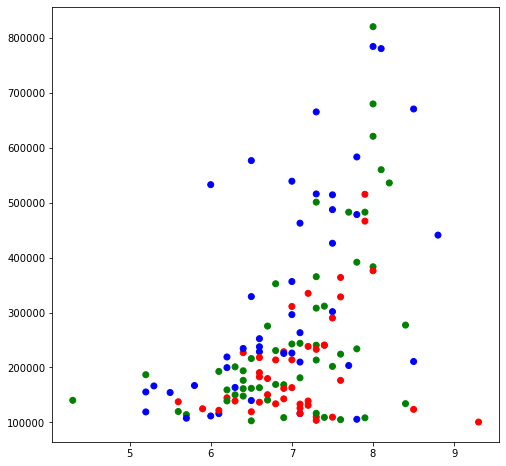

In [24]:
fig, ax = plt.subplots(figsize = (8,8))

colors = {1:'red', 2:'green', 3:'blue'}

ax.scatter(x=n_combined_df['averagerating'],
           y=n_combined_df['numvotes'],
           c=n_combined_df['num_of_genres'].map(colors))

In [22]:
n_combined_df[n_combined_df['numvotes'] > 650000]

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,num_of_genres
76,146,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,Action,7.3,665594,5,nm0923736,director,NaN,NaN,Joss Whedon,1964.0,NaN,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",3
103,198,tt3659388,The Martian,The Martian,2015,144.0,Adventure,8.0,680116,5,nm0000631,director,NaN,NaN,Ridley Scott,1937.0,NaN,"producer,director,production_designer","tt3659388,tt0083658,tt0172495,tt0103074",2
268,471,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,Action,8.0,784780,5,nm0009190,director,NaN,NaN,J.J. Abrams,1966.0,NaN,"producer,writer,music_department","tt0411008,tt0796366,tt1650062,tt2488496",3
410,735,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,Action,8.1,780910,5,nm0004306,director,NaN,NaN,George Miller,1945.0,NaN,"producer,writer,director","tt1392190,tt0079501,tt0082694,tt0366548",3
449,799,tt1431045,Deadpool,Deadpool,2016,108.0,Action,8.0,820847,5,nm1783265,director,NaN,NaN,Tim Miller,NaN,NaN,"director,writer,visual_effects","tt9561862,tt0425410,tt1431045,tt1981115",2
1051,1769,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,Action,8.5,670926,5,nm0751577,director,NaN,NaN,Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796",3
